In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import ListedColormap

In [10]:
df = pd.read_csv("Speed+Dating+Data.csv", encoding='ISO-8859-1')
print(df.shape)

(8378, 195)


In [11]:
print(df.columns)

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)


In [12]:
print(df.describe)

<bound method NDFrame.describe of       iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

     

In [13]:
print(df.describe(include=['object']))

           field     undergra    mn_sat    tuition      from zipcode  \
count       8315         4914      3133       3583      8299    7314   
unique       259          241        68        115       269     409   
top     Business  UC Berkeley  1,400.00  26,908.00  New York       0   
freq         521          107       403        241       522     355   

           income   career  
count        4279     8289  
unique        261      367  
top     55,080.00  Finance  
freq          124      202  


In [14]:
missing_values = df.isnull().sum()
print(missing_values)

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64


In [15]:
df_match_1 = df[df['match'] == 1]

# Vérifier les valeurs manquantes dans ce sous-ensemble
missing_values = df_match_1.isnull().sum()

# Afficher seulement les colonnes qui ont des valeurs manquantes
missing_values = missing_values[missing_values > 0]
print("Missing values for match=1:")
print(missing_values)

# Compter et afficher les valeurs de match avec les pourcentages
match_counts = df['match'].value_counts()
match_percentages = df['match'].value_counts(normalize=True) * 100

# Afficher les résultats
print("\nMatch counts:")
print(match_counts)
print("\nMatch percentages:")
print(match_percentages)

Missing values for match=1:
positin1     334
int_corr      30
age_o         18
race_o        14
pf_o_att      15
            ... 
attr5_3     1017
sinc5_3     1017
intel5_3    1017
fun5_3      1017
amb5_3      1017
Length: 180, dtype: int64

Match counts:
match
0    6998
1    1380
Name: count, dtype: int64

Match percentages:
match
0    83.528288
1    16.471712
Name: proportion, dtype: float64


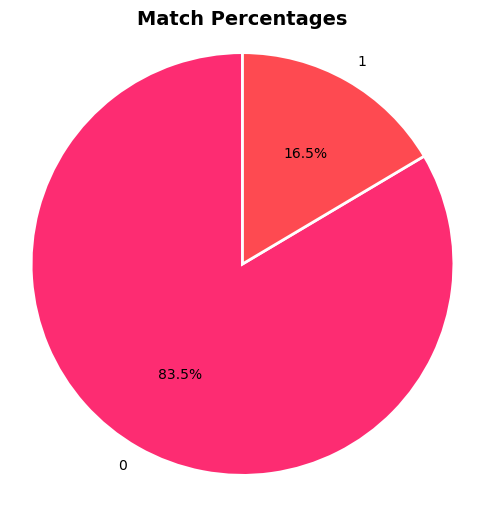

In [16]:
colors = ['#FD2C72', '#FE4A51']  # Couleurs personnalisées

plt.figure(figsize=(6, 6))
plt.pie(match_percentages, labels=match_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title('Match Percentages', fontsize=14, fontweight='bold')
plt.axis('equal')  # Assurer que le camembert est dessiné comme un cercle.

plt.show()

Number of rows after filtering for match = 1: 1380


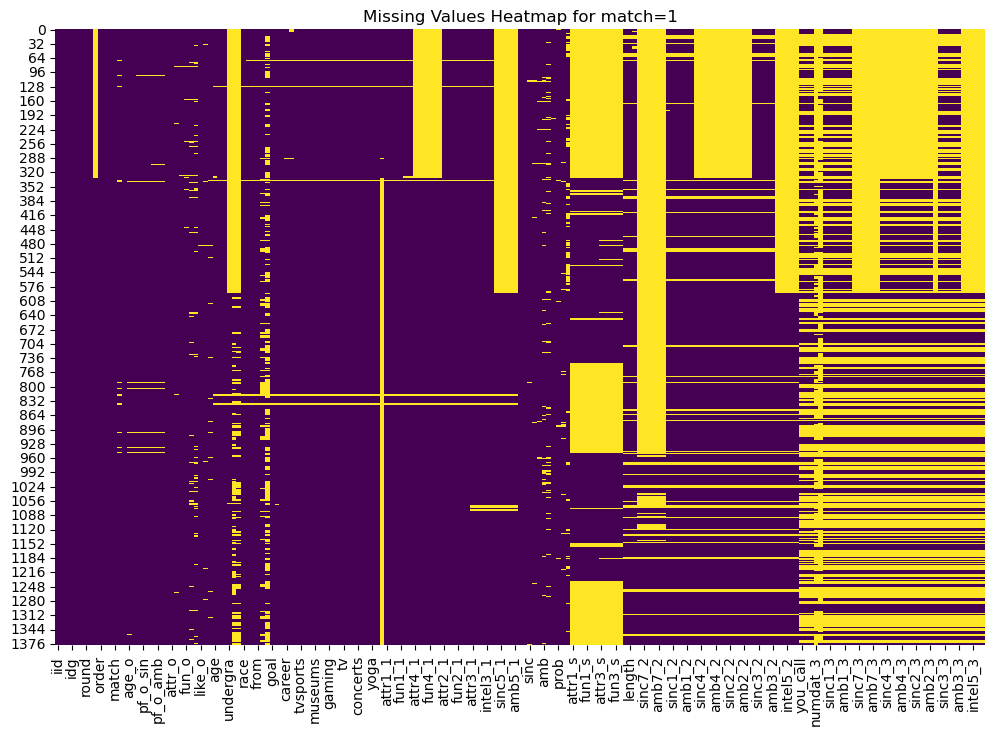

In [17]:
# Filtrer les lignes où match = 1 et réinitialiser l'index
df_match_1 = df[df['match'] == 1].reset_index(drop=True)

# Vérifier le nombre de lignes après le filtrage
print(f"Number of rows after filtering for match = 1: {df_match_1.shape[0]}")

# Visualiser les valeurs manquantes dans df_match_1
plt.figure(figsize=(12, 8))
sns.heatmap(df_match_1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for match=1')
plt.show()

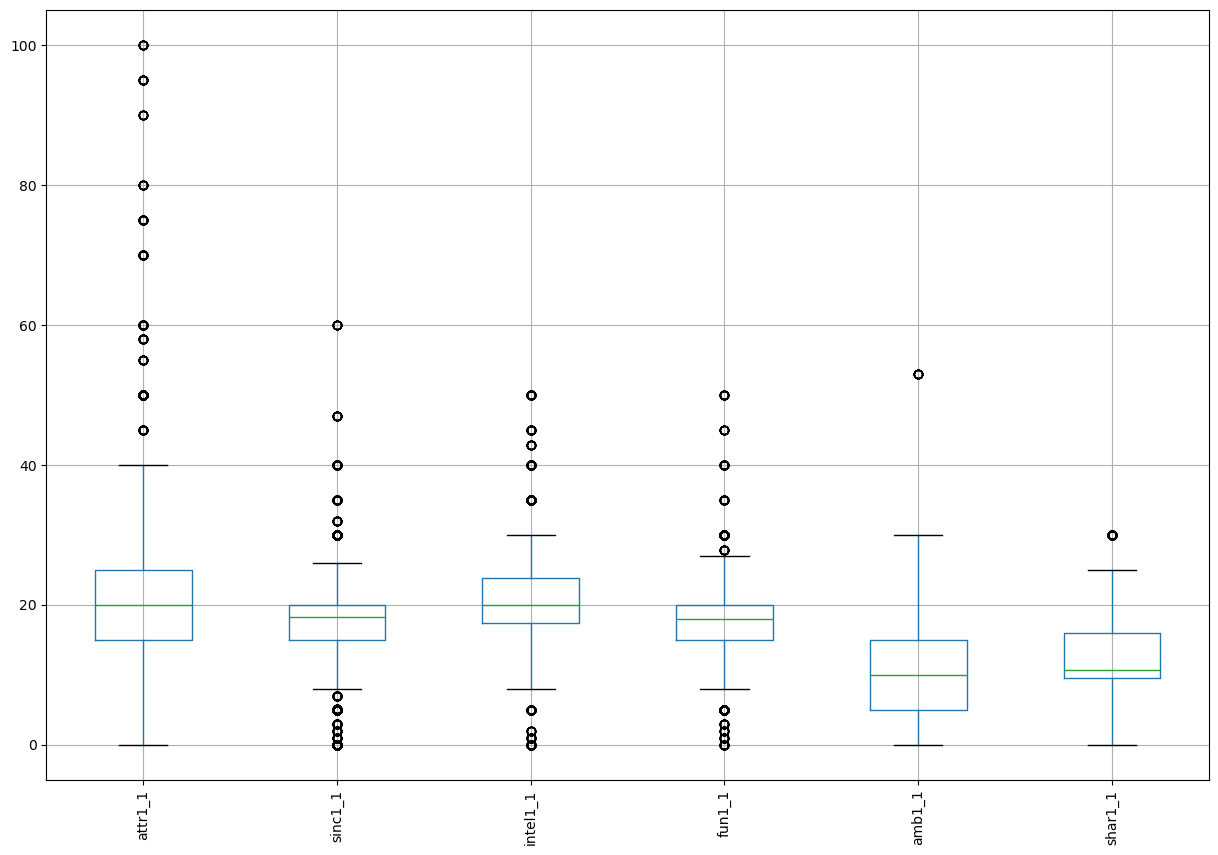

In [18]:

# Specify the columns you want to plot
columns_to_plot = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# Plot a boxplot for only the selected columns
df[columns_to_plot].boxplot(figsize=(15, 10))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

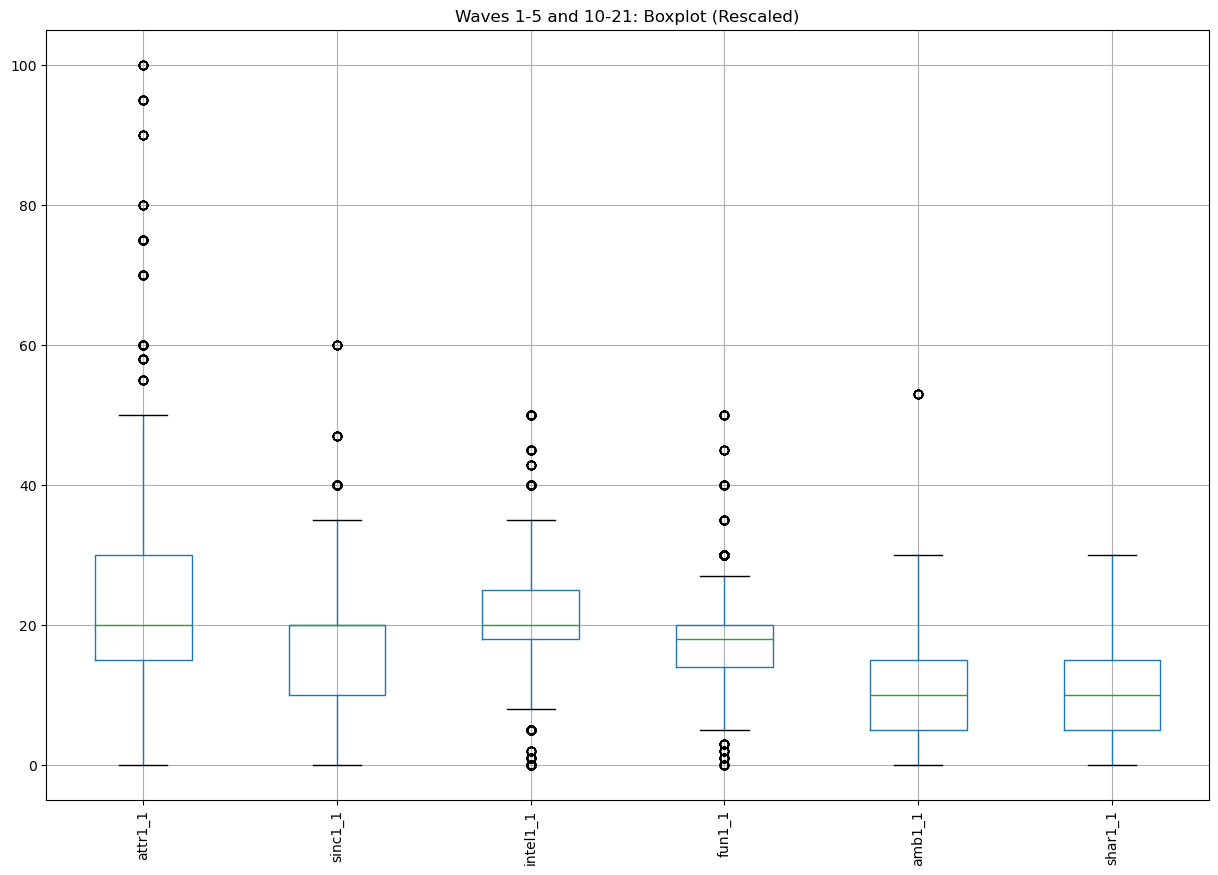

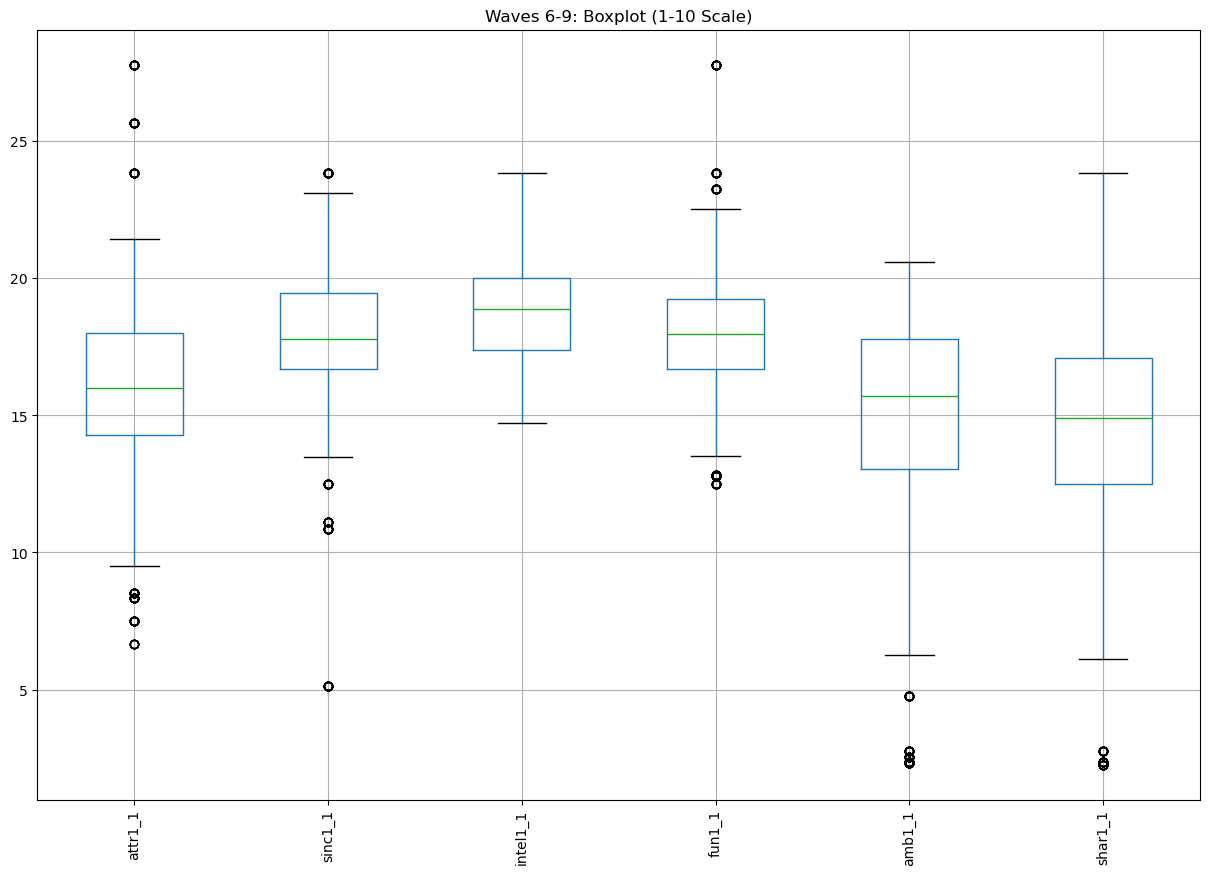

In [19]:
# Columns to rescale
columns_to_rescale = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# Split the data into two separate DataFrames
df_wave_1_5_10_21 = df[df['wave'].isin([1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])]
df_wave_6_9 = df[df['wave'].isin([6, 7, 8, 9])]

# Perform analysis separately on the two DataFrames
# Example: boxplot for each set of waves
df_wave_1_5_10_21.boxplot(column=columns_to_rescale, figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Waves 1-5 and 10-21: Boxplot (Rescaled)')
plt.show()

df_wave_6_9.boxplot(column=columns_to_rescale, figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Waves 6-9: Boxplot (1-10 Scale)')
plt.show()

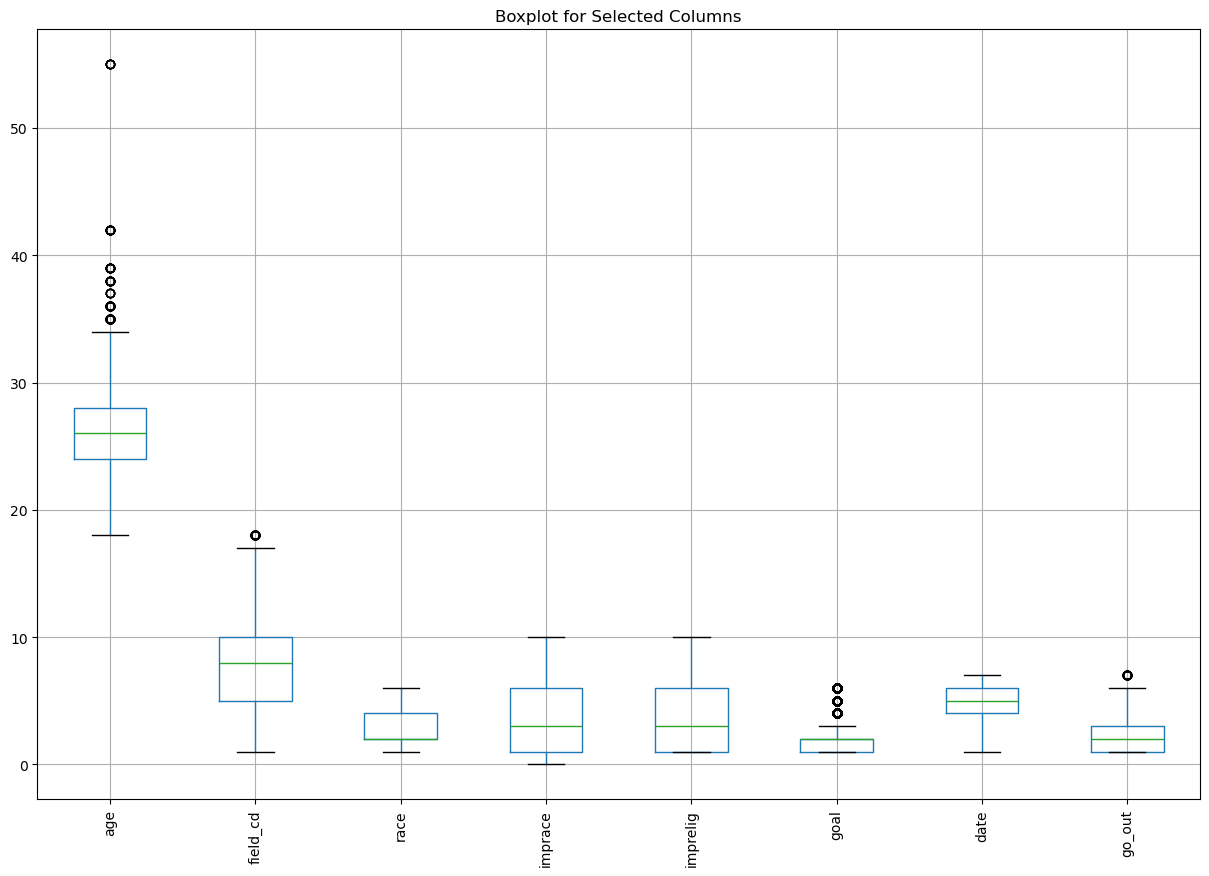

In [20]:
# Specify the columns you want to plot
columns_to_plot = ['age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career']

# Plot a boxplot for the selected columns
df[columns_to_plot].boxplot(figsize=(15, 10))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.title('Boxplot for Selected Columns')
plt.show()

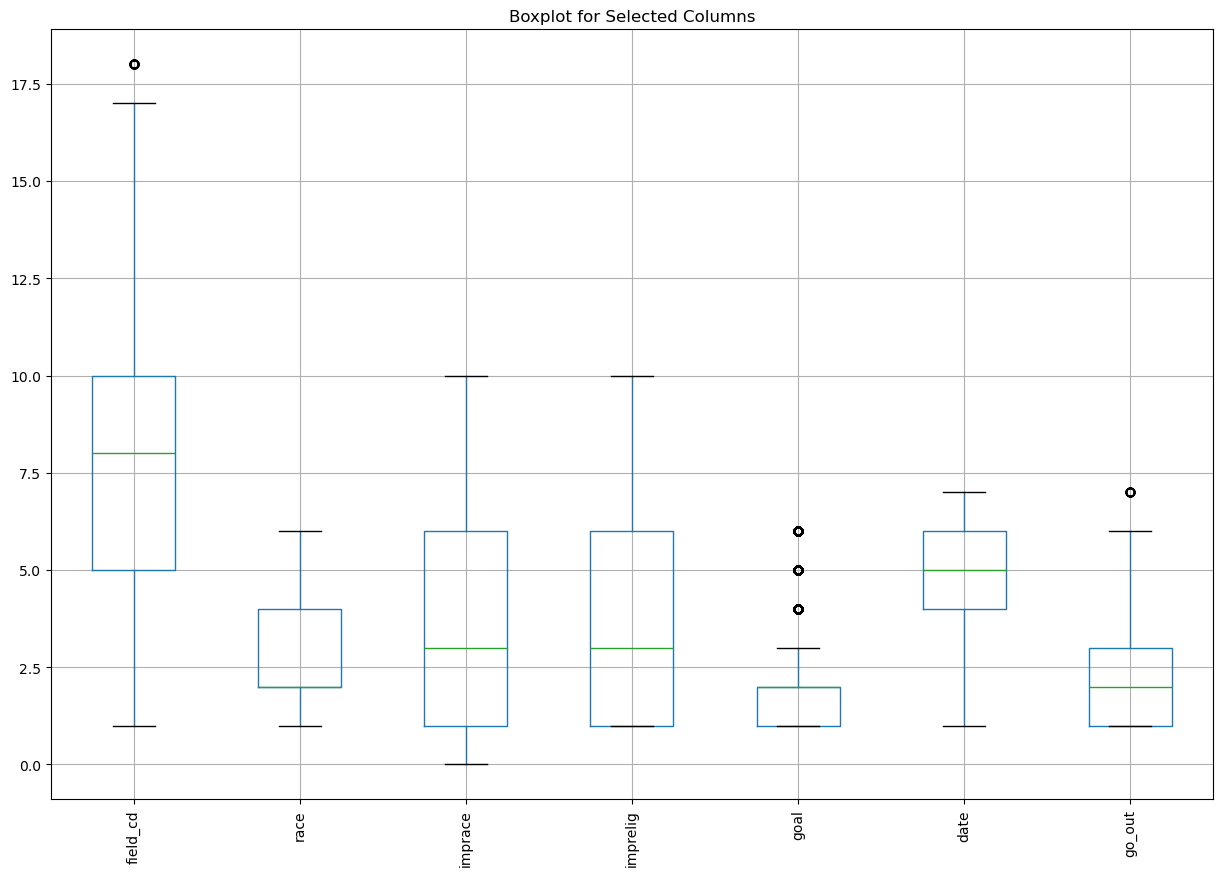

In [21]:
# Specify the columns you want to plot
columns_to_plot = ['field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career']

# Plot a boxplot for the selected columns
df[columns_to_plot].boxplot(figsize=(15, 10))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.title('Boxplot for Selected Columns')
plt.show()

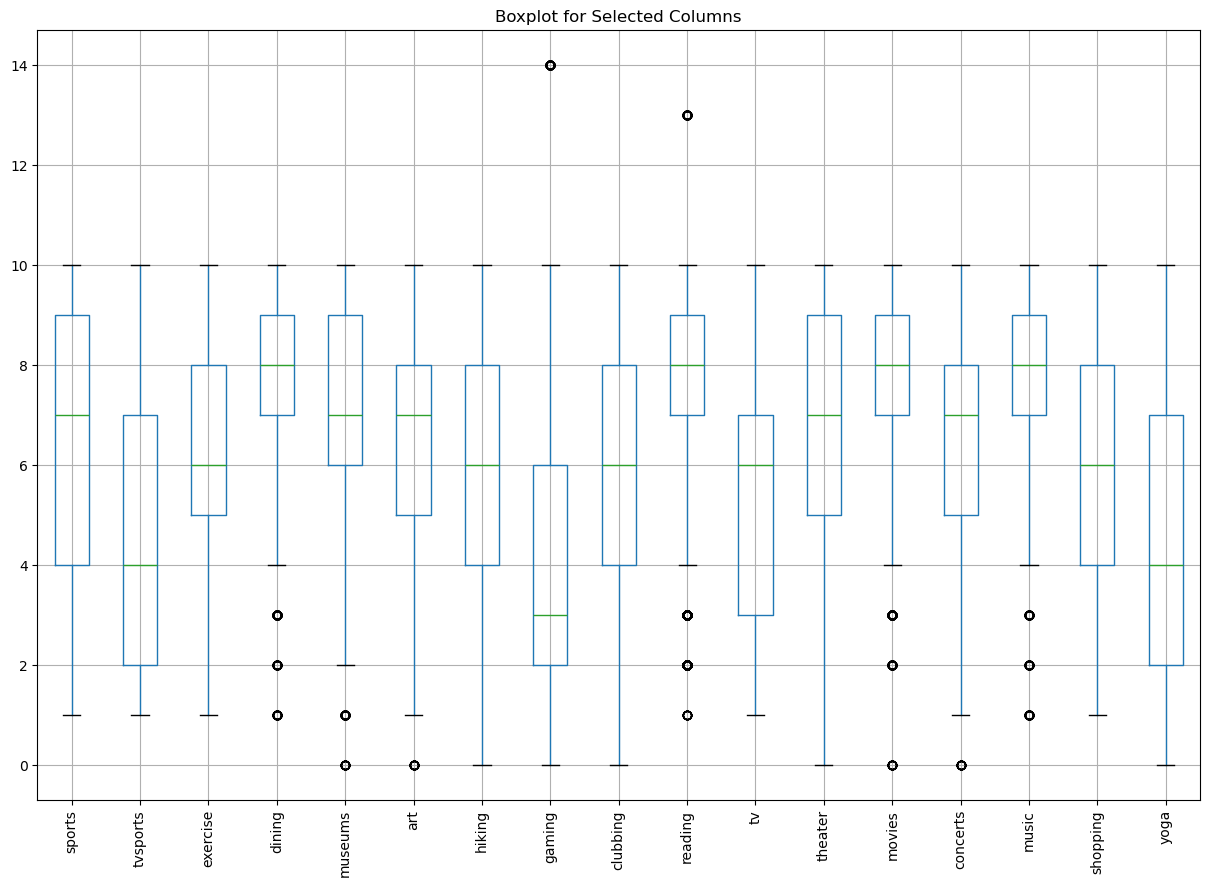

In [22]:
# Specify the columns you want to plot
columns_to_plot = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Plot a boxplot for the selected columns
df[columns_to_plot].boxplot(figsize=(15, 10))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.title('Boxplot for Selected Columns')
plt.show()

In [23]:
# Filtrer les données où match = 1
df_match_1 = df[df['match'] == 1].copy()  # Use .copy() to avoid modifying a slice of the original DataFrame

# Vérifier que 'gender' ne contient que 0 (Female) et 1 (Male)
df_match_1.loc[:, 'gender'] = df_match_1['gender'].apply(lambda x: 0 if x == 0 else 1)

# Sélectionner les colonnes d'activités et les regrouper par genre pour obtenir la moyenne
columns_of_interest = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Calculer la moyenne des réponses pour chaque genre
activity_by_gender = df_match_1.groupby('gender')[columns_of_interest].mean().reset_index()

# Remplacer 0 par 'Female' et 1 par 'Male' dans la colonne 'gender'
activity_by_gender['gender'] = activity_by_gender['gender'].replace({0: 'Female', 1: 'Male'})

# Transformer les données pour les adapter au scatter plot (melt)
activity_melted = pd.melt(activity_by_gender, id_vars='gender', var_name='Activity', value_name='Average Score')

# Créer le scatter plot interactif avec un fond blanc et les couleurs personnalisées
custom_colors = ['#FD2C72', '#929292']  # Rose pour Female, gris pour Male

fig = px.scatter(activity_melted, x='Activity', y='Average Score', color='gender',
                 title='Activity Preferences by Gender (Scatter Plot) - Match = 1',
                 labels={'gender': 'Gender', 'Average Score': 'Average Score (1-10 scale)'},
                 hover_name='Activity', 
                 size='Average Score', 
                 template='plotly_white',  # Fond blanc
                 color_discrete_sequence=custom_colors)  # Couleurs personnalisées

# Afficher le graphique interactif
fig.show()

In [24]:
# Filtrer les données où match = 0
df_match_0 = df[df['match'] == 0].copy()  # Utilisation de .copy() pour éviter de modifier directement le DataFrame original

# Vérifier que 'gender' ne contient que 0 (Female) et 1 (Male) sans changer les valeurs dans la base de données
df_match_0['gender'] = df_match_0['gender'].apply(lambda x: 0 if x == 0 else 1)

# Sélectionner les colonnes d'activités pour le calcul des moyennes par genre
columns_of_interest = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Calculer la moyenne des réponses pour chaque genre
activity_by_gender = df_match_0.groupby('gender')[columns_of_interest].mean().reset_index()

# Ne pas remplacer 0 par Female et 1 par Male, garder 0 et 1 dans la colonne 'gender'
# Transformation des données pour l'adapter au scatter plot (melt)
activity_melted = pd.melt(activity_by_gender, id_vars='gender', var_name='Activity', value_name='Average Score')

# Créer le scatter plot interactif avec les couleurs personnalisées
custom_colors = ['#FD2C72', '#929292']  # Rose pour Female (0), gris pour Male (1)

fig = px.scatter(activity_melted, x='Activity', y='Average Score', color='gender',
                 title='Activity Preferences by Gender (Scatter Plot) - Match = 0',
                 labels={'gender': 'Gender (0=Female, 1=Male)', 'Average Score': 'Average Score (1-10 scale)'},
                 hover_name='Activity', 
                 size='Average Score', 
                 template='plotly_white',  # Fond blanc
                 color_discrete_sequence=custom_colors)  # Couleurs personnalisées

# Afficher le graphique interactif
fig.show()

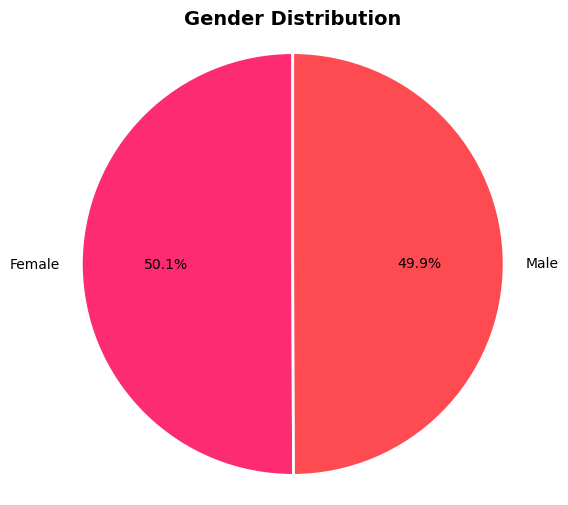

In [25]:
# Count the occurrences of each gender (assuming 0 = Female, 1 = Male)
gender_counts = df['gender'].value_counts()

# Define custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']  # Pink shades for Female and Male

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add a title and ensure the pie chart is circular
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle

# Show the plot
plt.show()

In [26]:
# Mapping race numbers to their respective categories
race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}

# Apply the mapping to the 'race' column
df['race_label'] = df['race'].map(race_mapping)

# Count the occurrences of each race category
race_counts = df['race_label'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

# Custom colors for each race category (same pink/red tones)
colors = ['#FD2C72', '#FE4A51', '#FF6A61', '#FF8A7B', '#FFA69B', '#FFC2BD']

# Create the bar chart
fig = px.bar(race_counts, x='Race', y='Count', title='Race Distribution',
             labels={'Count': 'Number of People', 'Race': 'Race'},
             color='Race', color_discrete_sequence=colors)

# Update layout: increase figure size, reduce font size, rotate x-axis labels, and remove legend
fig.update_layout(
    xaxis_title='Race',
    yaxis_title='Number of People',
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=10,  # Smaller font size for x-axis labels
    yaxis_tickfont_size=12,  # Smaller font size for y-axis labels
    showlegend=False,  # Hide legend
    width=800,  # Increase width
    height=500  # Increase height
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=-45)

In [27]:
# Mapping des numéros de race vers leurs descriptions respectives (seulement pour le graphique)
race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}

# Appliquer le mapping uniquement pour le graphique sans modifier la base de données
df['race_label'] = df['race'].map(race_mapping)

# Compter les occurrences de chaque catégorie de race
race_counts = df['race_label'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']  # Renommer les colonnes pour plus de clarté

# Couleurs personnalisées pour chaque catégorie de race (nuances de rose/rouge)
colors = ['#FD2C72', '#FE4A51', '#FF6A61', '#FF8A7B', '#FFA69B', '#FFC2BD']

# Créer le graphique en camembert (pie chart)
fig = px.pie(race_counts, names='Race', values='Count', title='Race Distribution',
             color='Race', color_discrete_sequence=colors)

# Mettre à jour la mise en page : ajuster la taille du graphique et la taille des polices
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    width=800,
    height=500
)

# Afficher le graphique
fig.show()

In [28]:
# Filtrer les données où match = 1
df_match_1 = df[df['match'] == 1].copy()

# Mapping race numbers to their respective categories
race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}

# Apply the mapping to the 'race' column for the filtered DataFrame
df_match_1['race_label'] = df_match_1['race'].map(race_mapping)

# Count the occurrences of each race category
race_counts = df_match_1['race_label'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

# Custom colors for each race category (same pink/red tones)
colors = ['#FD2C72', '#FE4A51', '#FF6A61', '#FF8A7B', '#FFA69B', '#FFC2BD']

# Create the bar chart
fig = px.bar(race_counts, x='Race', y='Count', title='Race Distribution for match=1',
             labels={'Count': 'Number of People', 'Race': 'Race'},
             color='Race', color_discrete_sequence=colors)

# Update layout: increase figure size, reduce font size, rotate x-axis labels, and remove legend
fig.update_layout(
    xaxis_title='Race',
    yaxis_title='Number of People',
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=10,  # Smaller font size for x-axis labels
    yaxis_tickfont_size=12,  # Smaller font size for y-axis labels
    showlegend=False,  # Hide legend
    width=800,  # Increase width
    height=500  # Increase height
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=-45)

# Show the chart
fig.show()

In [29]:
# Mapping goal numbers to their respective descriptions
goal_mapping = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'
}

# Apply the mapping to the 'goal' column
df['goal_label'] = df['goal'].map(goal_mapping)

# Count the occurrences of each goal category
goal_counts = df['goal_label'].value_counts().reset_index()
goal_counts.columns = ['Goal', 'Count']

# Custom colors for the bar chart
colors = ['#FD2C72', '#FE4A51', '#FF6A61', '#FF8A7B', '#FFA69B', '#FFC2BD']

# Create the horizontal bar chart
fig = px.bar(goal_counts, y='Goal', x='Count', orientation='h', title='Goal Distribution',
             labels={'Count': 'Number of People', 'Goal': 'Goal'},
             color='Goal', color_discrete_sequence=colors)

# Update layout: increase figure size and font size for better readability
fig.update_layout(
    xaxis_title='Number of People',
    yaxis_title='Goal',
    title_font_size=18,
    title_x=0.5,
    yaxis_tickfont_size=12,  # Adjust font size for y-axis labels
    xaxis_tickfont_size=12,  # Adjust font size for x-axis labels
    showlegend=False,  # Hide legend to reduce clutter
    width=800,  # Adjust width
    height=500  # Adjust height
)

In [30]:
# Mapping goal numbers to their respective descriptions
goal_mapping = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'
}

# Mapping gender numbers to their respective labels
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Apply the mappings to the 'goal' and 'gender' columns
df['goal_label'] = df['goal'].map(goal_mapping)
df['gender_label'] = df['gender'].map(gender_mapping)

# Count the occurrences of each goal category per gender
goal_gender_counts = df.groupby(['gender_label', 'goal_label']).size().reset_index(name='Count')

# Sort the data by 'Count' in descending order for each gender
goal_gender_counts = goal_gender_counts.sort_values(by=['gender_label', 'Count'], ascending=[True, False])

# Custom colors for the bar chart
colors = ['#FD2C72', '#FE4A51', '#FF6A61', '#FF8A7B', '#FFA69B', '#FFC2BD']

# Create the bar chart using facet rows for Female and Male
fig = px.bar(goal_gender_counts, x='Count', y='goal_label', color='goal_label', orientation='h',
             facet_row='gender_label', title='Goal Distribution by Gender',
             labels={'goal_label': 'Goal', 'Count': 'Number of People', 'gender_label': 'Gender'},
             color_discrete_sequence=colors)

# Update layout: increase figure size, adjust font size, remove legend
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    yaxis_tickfont_size=10,  # Smaller font size for y-axis labels
    xaxis_tickfont_size=12,  # Adjust font size for x-axis labels
    showlegend=False,  # Hide legend
    height=600  # Increase height to accommodate both facets
)

# Update y-axis labels for readability
fig.update_yaxes(matches=None)  # Allow each facet row to have its own y-axis

# Show the chart
fig.show()

In [31]:
print(df.columns)

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3',
       'amb5_3', 'race_label', 'goal_label', 'gender_label'],
      dtype='object', length=198)


In [32]:
# Filtrer les données où match = 1
df_match_1 = df[df['match'] == 1].copy()

# Mapping goal numbers to their respective descriptions
goal_mapping = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'
}

# Mapping gender numbers to their respective labels
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Apply the mappings to the 'goal' and 'gender' columns
df_match_1['goal_label'] = df_match_1['goal'].map(goal_mapping)
df_match_1['gender_label'] = df_match_1['gender'].map(gender_mapping)

# Count the occurrences of each goal category per gender
goal_gender_counts = df_match_1.groupby(['gender_label', 'goal_label']).size().reset_index(name='Count')

# Trier les données par nombre décroissant ('Count') pour chaque genre ('gender_label')
goal_gender_counts = goal_gender_counts.sort_values(by=['gender_label', 'Count'], ascending=[True, False])

# Custom colors for the bar chart
colors = ['#FD2C72', '#FE4A51', '#FF6A61', '#FF8A7B', '#FFA69B', '#FFC2BD']

# Create the bar chart using facet rows for Female and Male
fig = px.bar(goal_gender_counts, x='Count', y='goal_label', color='goal_label', orientation='h',
             facet_row='gender_label', title='Goal Distribution by Gender (Match = 1)',
             labels={'goal_label': 'Goal', 'Count': 'Number of People', 'gender_label': 'Gender'},
             color_discrete_sequence=colors)

# Update layout: increase figure size, adjust font size, remove legend
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    yaxis_tickfont_size=10,  # Smaller font size for y-axis labels
    xaxis_tickfont_size=12,  # Adjust font size for x-axis labels
    showlegend=False,  # Hide legend
    height=600  # Increase height to accommodate both facets
)

# Update y-axis labels for readability
fig.update_yaxes(matches=None)  # Allow each facet row to have its own y-axis

# Show the chart
fig.show()

In [33]:
# Mapping date numbers to their respective descriptions
date_mapping = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}

# Mapping gender numbers to their respective labels
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Apply the mappings to the 'date' and 'gender' columns
df['date_label'] = df['date'].map(date_mapping)
df['gender_label'] = df['gender'].map(gender_mapping)

# Count the occurrences of each date category per gender
date_gender_counts = df.groupby(['gender_label', 'date_label']).size().reset_index(name='Count')

# Custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']

# Create the grouped bar chart
fig = px.bar(date_gender_counts, x='date_label', y='Count', color='gender_label', barmode='group',
             title='Date Frequency Distribution by Gender',
             labels={'date_label': 'Date Frequency', 'Count': 'Number of People', 'gender_label': 'Gender'},
             color_discrete_sequence=colors)

# Update layout: adjust figure size, font size, and remove legend
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=10,  # Smaller font size for x-axis labels
    yaxis_tickfont_size=12,  # Adjust font size for y-axis labels
    width=800,  # Adjust width
    height=500  # Adjust height
)

# Rotate x-axis labels for readability
fig.update_xaxes(tickangle=-45)

# Show the chart
fig.show()

In [34]:
# Mapping go_out numbers to their respective descriptions
go_out_mapping = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}

# Mapping gender numbers to their respective labels
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Apply the mappings to the 'go_out' and 'gender' columns
df['go_out_label'] = df['go_out'].map(go_out_mapping)
df['gender_label'] = df['gender'].map(gender_mapping)

# Count the occurrences of each go_out category per gender
go_out_gender_counts = df.groupby(['go_out_label', 'gender_label']).size().reset_index(name='Count')

# Calculate percentage distribution of go_out per gender (resetting index to ensure alignment)
go_out_gender_counts['Percentage'] = go_out_gender_counts.groupby('gender_label')['Count'].transform(lambda x: x / x.sum() * 100)

# Custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']

# Create the stacked percentage area chart
fig = px.area(go_out_gender_counts, x='go_out_label', y='Percentage', color='gender_label', line_group='gender_label',
              title='Go_out Frequency Distribution by Gender',
              labels={'go_out_label': 'Go Out Frequency', 'Percentage': 'Percentage (%)', 'gender_label': 'Gender'},
              color_discrete_sequence=colors)

# Update layout: adjust figure size, font size, and remove legend
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=10,  # Smaller font size for x-axis labels
    yaxis_tickfont_size=12,  # Adjust font size for y-axis labels
    width=800,  # Adjust width
    height=500  # Adjust height
)

# Rotate x-axis labels for readability
fig.update_xaxes(tickangle=-45)

# Show the chart
fig.show()

In [35]:
# Mapping career_c numbers to their respective descriptions
career_mapping = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Banking/Consulting/Finance/CEO/etc',
    8: 'Real Estate',
    9: 'International/Humanitarian Affairs',
    10: 'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro sports/Athletics',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'
}

# Mapping gender numbers to their respective labels
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Apply the mappings to the 'career_c' and 'gender' columns
df['career_label'] = df['career_c'].map(career_mapping)
df['gender_label'] = df['gender'].map(gender_mapping)

# Count the occurrences of each career category per gender
career_gender_counts = df.groupby(['career_label', 'gender_label']).size().reset_index(name='Count')

# Custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']

# Create the grouped bar chart
fig = px.bar(career_gender_counts, x='career_label', y='Count', color='gender_label', barmode='group',
             title='Career Distribution by Gender',
             labels={'career_label': 'Career', 'Count': 'Number of People', 'gender_label': 'Gender'},
             color_discrete_sequence=colors)

# Update layout: increase figure size, adjust font size, and rotate x-axis labels
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=10,  # Smaller font size for x-axis labels
    yaxis_tickfont_size=12,  # Adjust font size for y-axis labels
    width=900,  # Increase width for better label visibility
    height=600  # Adjust height for better spacing
)

# Rotate x-axis labels for readability
fig.update_xaxes(tickangle=-45)

# Show the chart
fig.show()

In [36]:
# Valeur la plus petite (âge minimum)
age_min = df['age'].min()

# Valeur la plus grande (âge maximum)
age_max = df['age'].max()

# Afficher les résultats
print(f"L'âge minimum est : {age_min}")
print(f"L'âge maximum est : {age_max}")

L'âge minimum est : 18.0
L'âge maximum est : 55.0


In [37]:
# Set bin size for age groups in 5-year intervals (18 to 55)
df['age_group'] = pd.cut(df['age'], bins=[18, 23, 28, 33, 38, 43, 48, 55], right=False, labels=[
    '18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-54'])

# Mapping gender numbers to their respective labels
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Apply the mapping to the 'gender' column
df['gender_label'] = df['gender'].map(gender_mapping)

# Count the occurrences of each age group per gender
age_gender_counts = df.groupby(['age_group', 'gender_label']).size().reset_index(name='Count')

# Invert the counts for Female so that it can be displayed on the left
age_gender_counts.loc[age_gender_counts['gender_label'] == 'Female', 'Count'] *= -1

# Custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']

# Create the population pyramid (stacked horizontal bar chart)
fig = px.bar(age_gender_counts, x='Count', y='age_group', color='gender_label', orientation='h',
             title='Age Pyramid by Gender (5-Year Intervals)',
             labels={'age_group': 'Age Group', 'Count': 'Number of People', 'gender_label': 'Gender'},
             color_discrete_sequence=colors)

# Update layout: adjust figure size, font size, and add custom labels
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    xaxis_title='Number of People',
    yaxis_title='Age Group',
    width=900,  # Increase width
    height=600  # Adjust height for better spacing
)

# Show the chart
fig.show()

C:\Users\leasc\AppData\Local\Temp\ipykernel_48448\705592552.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [38]:
# Set bin size for age groups in 5-year intervals (18 to 55), ensuring 55 is included in the last bin
df['age_group'] = pd.cut(df['age'], bins=[18, 23, 28, 33, 38, 43, 48, 56], right=False, labels=[
    '18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-55'])

# Mapping gender numbers to their respective labels
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Apply the mapping to the 'gender' column
df['gender_label'] = df['gender'].map(gender_mapping)

# Count the occurrences of each age group per gender
age_gender_counts = df.groupby(['age_group', 'gender_label'], observed=False).size().reset_index(name='Count')

# Calculate the percentage of each age group within each gender
age_gender_counts['Percentage'] = age_gender_counts.groupby('gender_label')['Count'].transform(lambda x: x / x.sum() * 100)

# Invert the counts for Female so that it can be displayed on the left
age_gender_counts.loc[age_gender_counts['gender_label'] == 'Female', 'Count'] *= -1

# Combine count and percentage for labeling
age_gender_counts['Label'] = age_gender_counts.apply(lambda row: f"{abs(row['Count'])} ({row['Percentage']:.1f}%)", axis=1)

# Custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']

# Create the population pyramid (stacked horizontal bar chart)
fig = px.bar(age_gender_counts, x='Count', y='age_group', color='gender_label', orientation='h',
             title='Age Pyramid by Gender (5-Year Intervals)',
             labels={'age_group': 'Age Group', 'Count': 'Number of People', 'gender_label': 'Gender'},
             color_discrete_sequence=colors, text=age_gender_counts['Label'])  # Add count and percentage as labels

# Update layout: adjust figure size, font size, and add custom labels
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    xaxis_title='Number of People',
    yaxis_title='Age Group',
    width=900,  # Increase width
    height=600  # Adjust height for better spacing
)

# Show the chart
fig.show()

In [39]:
# Set bin size for age groups in 5-year intervals (18 to 55) including age 55
df['age_group'] = pd.cut(df['age'], bins=[18, 23, 28, 33, 38, 43, 48, 56], right=False, labels=[
    '18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-55'])

# Mapping gender numbers to their respective labels
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Apply the mapping to the 'gender' column
df['gender_label'] = df['gender'].map(gender_mapping)

# Count the occurrences of each age group per gender, adding observed=True to adopt the future behavior
age_gender_counts_summary = df.groupby(['age_group', 'gender_label'], observed=True).size().reset_index(name='Count')

# Display the summary
print(age_gender_counts_summary)

   age_group gender_label  Count
0      18-22       Female    587
1      18-22         Male    444
2      23-27       Female   2349
3      23-27         Male   2173
4      28-32       Female    865
5      28-32         Male   1379
6      33-37       Female    293
7      33-37         Male    130
8      38-42       Female     19
9      38-42         Male     38
10     48-55       Female      6


In [40]:
import pandas as pd
import plotly.express as px

# Créer des tranches d'âge de 5 ans comme décrit
bins = [18, 23, 28, 33, 38, 43, 48, 56]
labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-55']

# Appliquer les tranches d'âge aux colonnes 'age' et 'age_o'
df['age_group'] = pd.cut(df['age'], bins=bins, right=False, labels=labels)
df['partner_age_group'] = pd.cut(df['age_o'], bins=bins, right=False, labels=labels)

# Mapping des genres (ajout explicite pour la clarté dans les graphiques)
gender_mapping = {0: 'Female', 1: 'Male'}
df['gender_label'] = df['gender'].map(gender_mapping)
df['partner_gender_label'] = df['gender'].map(lambda x: 'Male' if x == 0 else 'Female')

# Fonction pour calculer les pourcentages de tranches d'âge rencontrées
def calculate_age_meeting_percentages(df):
    # Compter les occurrences des combinaisons de tranches d'âges rencontrées
    age_meeting_counts = df.groupby(['age_group', 'partner_age_group', 'gender_label', 'partner_gender_label']).size().reset_index(name='Count')
    
    # Calculer le pourcentage de chaque tranche d'âge rencontrée pour chaque tranche d'âge de l'individu
    age_meeting_counts['Percentage'] = age_meeting_counts.groupby(['age_group', 'gender_label'])['Count'].transform(lambda x: x / x.sum() * 100)
    
    return age_meeting_counts

# Calcul des pourcentages pour toutes les rencontres
age_meeting_percentages = calculate_age_meeting_percentages(df)

# Calcul des pourcentages uniquement pour les rencontres ayant abouti à un match (match = 1)
age_meeting_percentages_match = calculate_age_meeting_percentages(df[df['match'] == 1])

# Fonction pour afficher les graphiques en barres empilées
def plot_stacked_bar(data, title):
    fig = px.bar(data, x='age_group', y='Percentage', color='partner_age_group',
                 facet_col='gender_label',  # Ajouter des facettes par genre
                 labels={'age_group': 'Age Group', 'Percentage': 'Percentage of Encounters', 'partner_age_group': 'Partner Age Group'},
                 title=title, color_discrete_sequence=px.colors.qualitative.Set1)

    # Mise à jour du layout
    fig.update_layout(
        title_font_size=18,
        title_x=0.5,
        xaxis_tickfont_size=12,
        yaxis_tickfont_size=12,
        xaxis_title='Age Group',
        yaxis_title='Percentage of Encounters',
        width=900,
        height=600
    )
    
    fig.show()

# Afficher le graphique pour toutes les rencontres
plot_stacked_bar(age_meeting_percentages, "Age Group Encounters for All Dates")

# Afficher le graphique pour les matchs (match = 1)
plot_stacked_bar(age_meeting_percentages_match, "Age Group Encounters for Matches Only")

# Analyser les meilleures configurations pour provoquer un match
def analyze_best_age_match_configurations(df):
    # Calculer les pourcentages pour les matchs
    best_matches = df[df['match'] == 1].groupby(['age_group', 'partner_age_group']).size().reset_index(name='Count')
    best_matches['Percentage'] = best_matches.groupby('age_group')['Count'].transform(lambda x: x / x.sum() * 100)
    
    # Supprimer les lignes où la colonne Percentage est NaN
    best_matches = best_matches.dropna(subset=['Percentage'])
    
    # Trouver la combinaison ayant le plus grand pourcentage de match pour chaque tranche d'âge
    best_matches = best_matches.loc[best_matches.groupby('age_group')['Percentage'].idxmax()]
    
    return best_matches

# Afficher les meilleures configurations de match
best_age_match_configurations = analyze_best_age_match_configurations(df)
print("Best Age Group Configurations for Matches:")
print(best_age_match_configurations)

C:\Users\leasc\AppData\Local\Temp\ipykernel_48448\2259937286.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\leasc\AppData\Local\Temp\ipykernel_48448\2259937286.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\leasc\AppData\Local\Temp\ipykernel_48448\2259937286.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\leasc\AppData\Local\Temp\ipykernel_48448\2259937286.py:23: FutureWarning:

c:\Users\leasc\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\leasc\AppData\Local\Temp\ipykernel_48448\2259937286.py:63: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\leasc\AppData\Local\Temp\ipykernel_48448\2259937286.py:64: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\leasc\AppData\Local\Temp\ipykernel_48448\2259937286.py:70: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



ValueError: attempt to get argmax of an empty sequence